#### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени - временной ряд, одно и то же значение на протяжении определенного периода.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В - изучается одно значение, которое меняется от 0 до пика и снова до 0 в зависимости от времени полета. временной ряд. 

в) количество отказов компьютера - набор данных будет временным рядом, если данное количество будет иметь привязку ко времени. 

г) число обращений в поликлинику по району - сравнение числа обращений в разных районах не является временным рядом. Но если это количество посещений одной поликлиники (или всех в районе) в разные периоды, то является. 

д) координаты автобуса при движении по маршруту - не является временным рядом

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - не является временным рядом. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00. Мы знаем из описания, что шаг измерений по времени составляет 1 час. Общий объем данных составляет 119068  значений, а тип измеряемой информации при записи был определен как float64. Пропусков нет

Посмотрим сразу на характеристики нашего временного ряда в смысле основных статистик (используем pd.describe())

In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Максимальное значение сильно превышает квартиль 75%, возможно это означает выброс

C:\Users\vladi\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

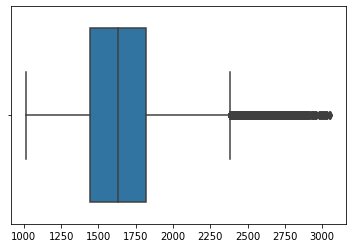

In [6]:
sns.boxplot(data.values)

In [7]:
# убедимся, что пропусков нет
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

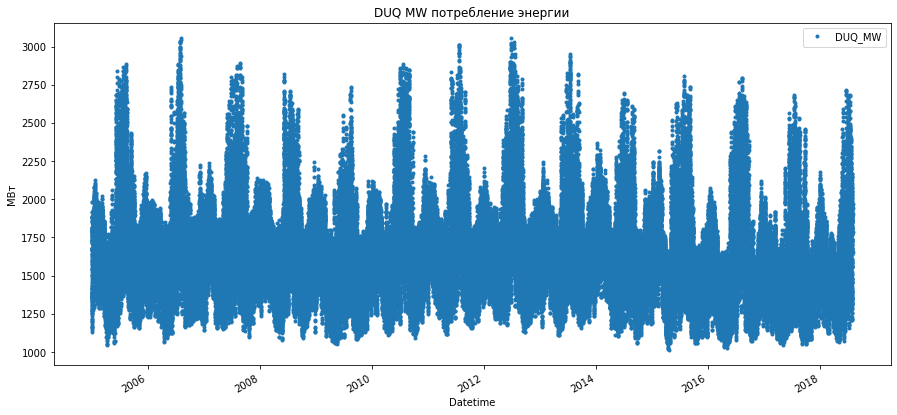

In [8]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ MW потребление энергии' )
plt.ylabel ( 'МВт' )

### Обсуждение визуализации

- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы
    - провалов и ярковыраженных выбросов не обнаружено

#### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.


In [9]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent = brent.sort_index()
brent.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [10]:
brent_weekly = brent.resample('W').mean()
brent_weekly.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [11]:
brent_monthly = brent.resample('M').mean()
brent_monthly.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [13]:
brent_weekly_std = brent.resample('W').std()
brent_monthly_std = brent.resample('M').std()

brent_annual = brent.resample('Y').mean()
brent_annual_std = brent.resample('Y').std()

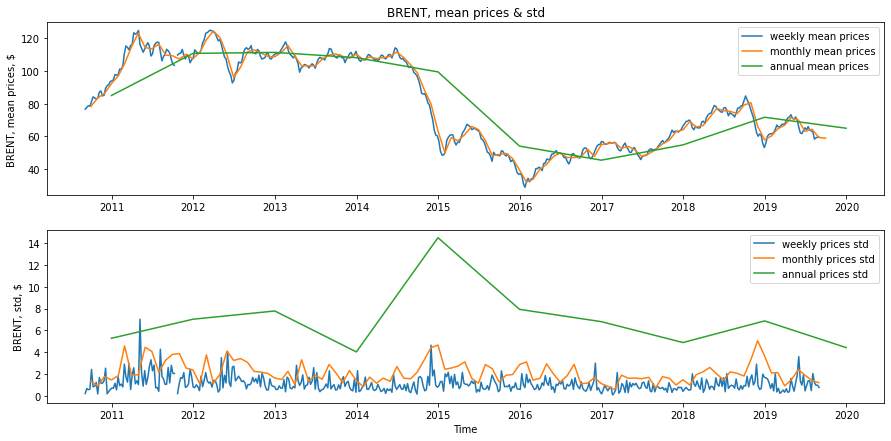

In [15]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.ylabel('BRENT, mean prices, $')
plt.plot(brent_weekly.index, brent_weekly, label='weekly mean prices' )
plt.plot(brent_monthly.index, brent_monthly, label='monthly mean prices')
plt.plot(brent_annual.index, brent_annual, label='annual mean prices')
plt.legend()

plt.title('BRENT, mean prices & std')

plt.subplot(2, 1, 2)
plt.ylabel('BRENT, std, $')
plt.plot(brent_weekly_std.index, brent_weekly_std, label='weekly prices std' )
plt.plot(brent_monthly_std.index, brent_monthly_std, label='monthly prices std')
plt.plot(brent_annual_std.index, brent_annual_std, label='annual prices std')
plt.legend()

plt.xlabel('Time')
plt.show()

#### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Недельные и месячные графики средних цен показывают более краткосрочную динамику изменения цены. Годовой график же является более сглаженным, показывает скорее направление движения изменения стоимости.

График отлонения же на краткосрочных периодах показывает насколько сильно отлонялась стоимость от предыдущих значений - показывает примерно те же колебания, но без трендов. Общегодовой же очень ярко реагирует на сильнеы отклонения в стоимости. 